<a href="https://colab.research.google.com/github/darshannayak21/bml/blob/main/naivebayes4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.83      0.64       210
           1       0.52      0.31      0.39       206
           2       0.77      0.59      0.67       184

    accuracy                           0.58       600
   macro avg       0.60      0.58      0.57       600
weighted avg       0.60      0.58      0.56       600

Confusion Matrix:
[[174  31   5]
 [115  64  27]
 [ 47  28 109]]
Accuracy: 57.83%


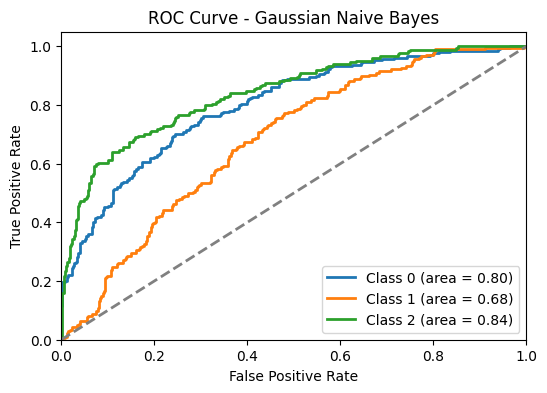

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score

# Load the California housing test dataset
df = pd.read_csv('/content/sample_data/california_housing_test.csv')

# Binarize the target variable (since Gaussian Naive Bayes is a classifier)
# Let's convert the 'median_house_value' into categories (e.g., low, medium, high prices)
df['house_value_category'] = pd.qcut(df['median_house_value'], q=3, labels=[0, 1, 2])

# Separate features and target variable
X = df.drop(['median_house_value', 'house_value_category'], axis=1)
y = df['house_value_category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred = gnb.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print accuracy
print(f"Accuracy: {accuracy * 100:.2f}%")

# Compute ROC curve and ROC AUC for each class
y_test_bin = pd.get_dummies(y_test).values  # One-hot encode the target variable
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):  # We have 3 categories
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], gnb.predict_proba(X_test)[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], gnb.predict_proba(X_test)[:, i])

# Plot ROC curve for each class
plt.figure(figsize=(6, 4))
for i in range(3):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (area = {roc_auc[i]:0.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gaussian Naive Bayes')
plt.legend(loc="lower right")
plt.show()
